In [1]:
from datetime import *
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
df_pc = pd.read_csv('pc_data.csv')
df_os = pd.read_csv('os_data.csv')
df_receipt1 = pd.read_csv('receipt_1.csv')
df_receipt2 = pd.read_csv('receipt_2.csv')

In [3]:
df_all_receipts = pd.concat([df_receipt1,df_receipt2], ignore_index=True)

In [4]:
df_merged = df_all_receipts.merge(df_pc, how='right')
df_merged = df_merged.merge(df_os, how='right')

In [5]:
df_merged['general_price'] = df_merged['sold']*(df_merged['pc_price'] + df_merged['os_price'])
df_merged

,date,pc_id,os_id,sold,pc_name,pc_price,os_name,os_price,general_price
0,2022/09/17,2,0,8,razer,299.0,default,0.0,2392.0
1,2020/12/21,5,0,6,mac,400.0,default,0.0,2400.0
2,2022/6/14,6,0,10,xiaomi mi,200.0,default,0.0,2000.0
3,2022/09/12,1,1,12,lenovo,259.0,windows,20.0,3348.0
4,2021/09/12,1,1,2,lenovo,259.0,windows,20.0,558.0
5,2021/09/20,2,1,8,razer,299.0,windows,20.0,2552.0
6,2021/09/12,2,1,8,razer,299.0,windows,20.0,2552.0
7,2021/09/12,1,2,2,lenovo,259.0,linux,40.0,598.0
8,2020/02/5,2,2,9,razer,299.0,linux,40.0,3051.0
9,2020/10/09,4,2,8,hp,239.9,linux,40.0,2239.2


In [6]:
# сумарна вартість проданої за весь час техніки
print('General price of machinery: ')
df_merged['general_price'].sum()

General price of machinery: 


34847.0

In [7]:
# вартість проданої за весь час техніки для кожної марки
df_group_by_pc_name = df_merged.groupby('pc_name').sum()
df_group_by_pc_name = df_group_by_pc_name['general_price']

In [8]:
df_group_by_pc_name

pc_name
asus          5123.8
hp            4317.6
lenovo        5619.6
mac           5040.0
razer        10547.0
xiaomi mi     4199.0
Name: general_price, dtype: float64

<AxesSubplot:xlabel='pc_name'>

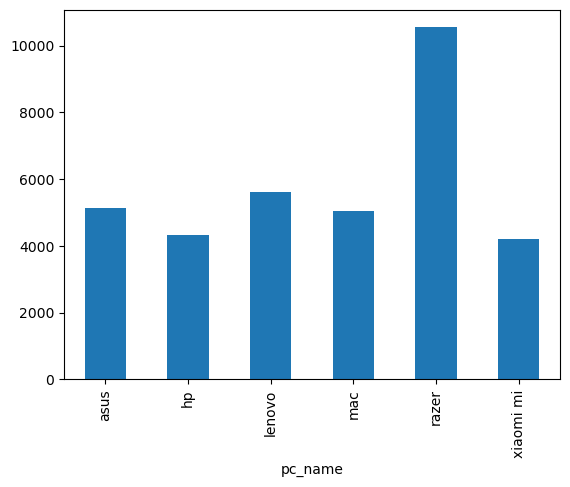

In [9]:
# графік до попереднього пункту
df_group_by_pc_name.plot(kind='bar')

<AxesSubplot:ylabel='general_price'>

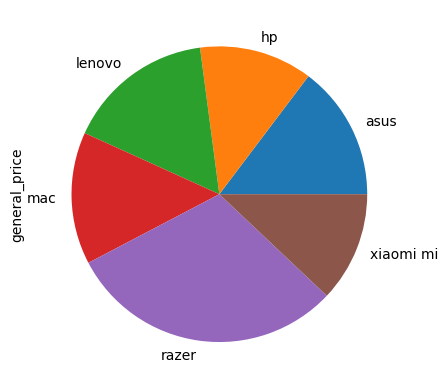

In [10]:
df_group_by_pc_name.plot(kind='pie')

In [11]:
# для конкретної системи сумарна вартість проданої техніки
def paid_sum(os = 'windows'):
    df_new = df_merged.groupby(['os_name', 'pc_name']).sum()
    df_new = df_new.loc[os, 'general_price']
    display(df_new)
    df_new.plot(kind = 'bar', label='da')

In [12]:
widgets.interact(paid_sum, os=df_os['os_name'])

interactive(children=(Dropdown(description='os', index=1, options=('default', 'windows', 'linux', 'ubuntu'), v…

<function __main__.paid_sum(os='windows')>